In [1]:
import matplotlib.pyplot as plt
import random
from nearest_nb import Point

In [2]:
arr = [[2, 3], [-1, 2], [3, 4]]
x = [2, -1, 3]
y = [3, 2, 4]

print(arr)

[[2, 3], [-1, 2], [3, 4]]


In [3]:
D = 2

tof = [True, False]
dataset = []
for _ in range(10):
    coords = []
    for _ in range(D):  # x, y, z... n-dimensions
        coords.append(random.uniform(1, 50))
    dataset.append(Point(coords, tof[random.randint(0, 1)]))


In [4]:
x = []
y = []
for point in dataset:
    x.append(point.coords[0])
    y.append(point.coords[1])

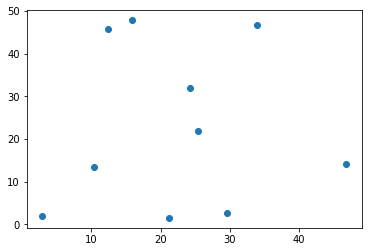

In [5]:
plt.scatter(x, y);
